In [64]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import torch
import torch.nn as nn

# progress bar
from tqdm import trange
# import torchvision.datasets as dsets

In [27]:
def load_images(file_path):
    with gzip.open(file_path, "rb") as f:
        data = np.frombuffer(f.read(), dtype=np.uint8).copy()

    return data[16:].reshape((-1, 28, 28))

def load_labels(file_path):
    with gzip.open(file_path, "rb") as f:
        data = np.frombuffer(f.read(), dtype=np.uint8).copy()
        
    return data[8:]

In [28]:
x_train_fp = "./data/mnist/train-images-idx3-ubyte.gz"
y_train_fp = "./data/mnist/train-labels-idx1-ubyte.gz"
x_test_fp = "./data/mnist/t10k-images-idx3-ubyte.gz"
y_test_fp = "./data/mnist/t10k-labels-idx1-ubyte.gz"

x_train = load_images(x_train_fp)
y_train = load_labels(y_train_fp)
x_test = load_images(x_test_fp)
y_test = load_labels(y_test_fp)

In [104]:
x_train.shape

(60000, 28, 28)

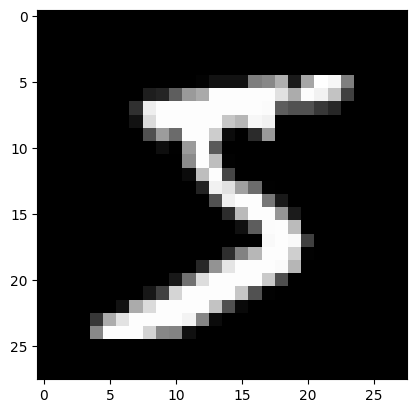

5


In [29]:
plt.imshow(x_train[0], cmap="gray")
plt.show()
print(y_train[0])

In [110]:
# Neural Network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # fc1: fully connected layer 1 - 784 inputs, 128 outputs
        self.fc1 = nn.Linear(784, 128)
        # fc2: fully connected layer 2 - 128 inputs, 10 outputs
        self.fc2 = nn.Linear(128, 10)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [149]:
# model
model = NeuralNet()

# training
batch_size = 128
learning_rate = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []
accuracies = []


# := is walrus operator, it assigns the value to the variable, in this case it returns t as an iterable
for k in (t := trange(500)):
    sample = np.random.choice(x_train.shape[0], batch_size)
    X = torch.tensor(x_train[sample].reshape((-1, 28*28))).float()
    Y = torch.tensor(y_train[sample]).long()

    # zero the parameter gradients
    optimizer.zero_grad()
    output = model(X)

    # calculate accuracy
    _, predicted = torch.max(output.data, 1)
    correct = (predicted == Y).float().mean()

    # calculate loss
    loss = loss_function(output, Y)

    # backpropagate
    loss.backward()

    # update weights
    optimizer.step()

    loss = loss.item()
    accuracy = correct.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description(f"Loss: {loss:.4f} | Acc: {accuracy:.4f}")

Loss: 0.1669 | Acc: 0.9297: 100%|██████████| 500/500 [00:01<00:00, 287.44it/s]


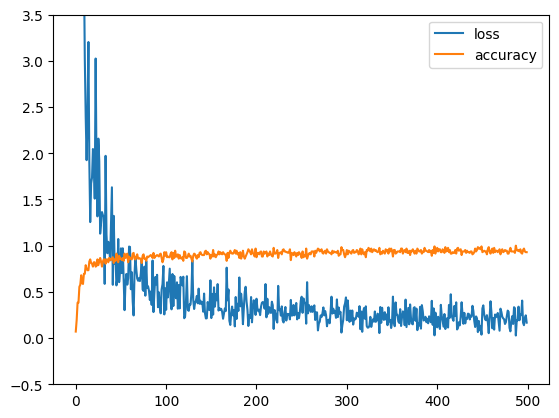

In [150]:
# plot loss and accuracy
plt.ylim(-0.5, 3.5)
plt.plot(losses, label="loss")
plt.plot(accuracies, label="accuracy")
plt.legend()
plt.show()

In [151]:
# test accuracy
y_test_preds = torch.argmax(model(torch.tensor(x_test.reshape((-1, 28*28))).float()), dim=1)
print("Test accuracy: ", (y_test_preds == torch.tensor(y_test)).float().mean().item())

Test accuracy:  0.9369999766349792


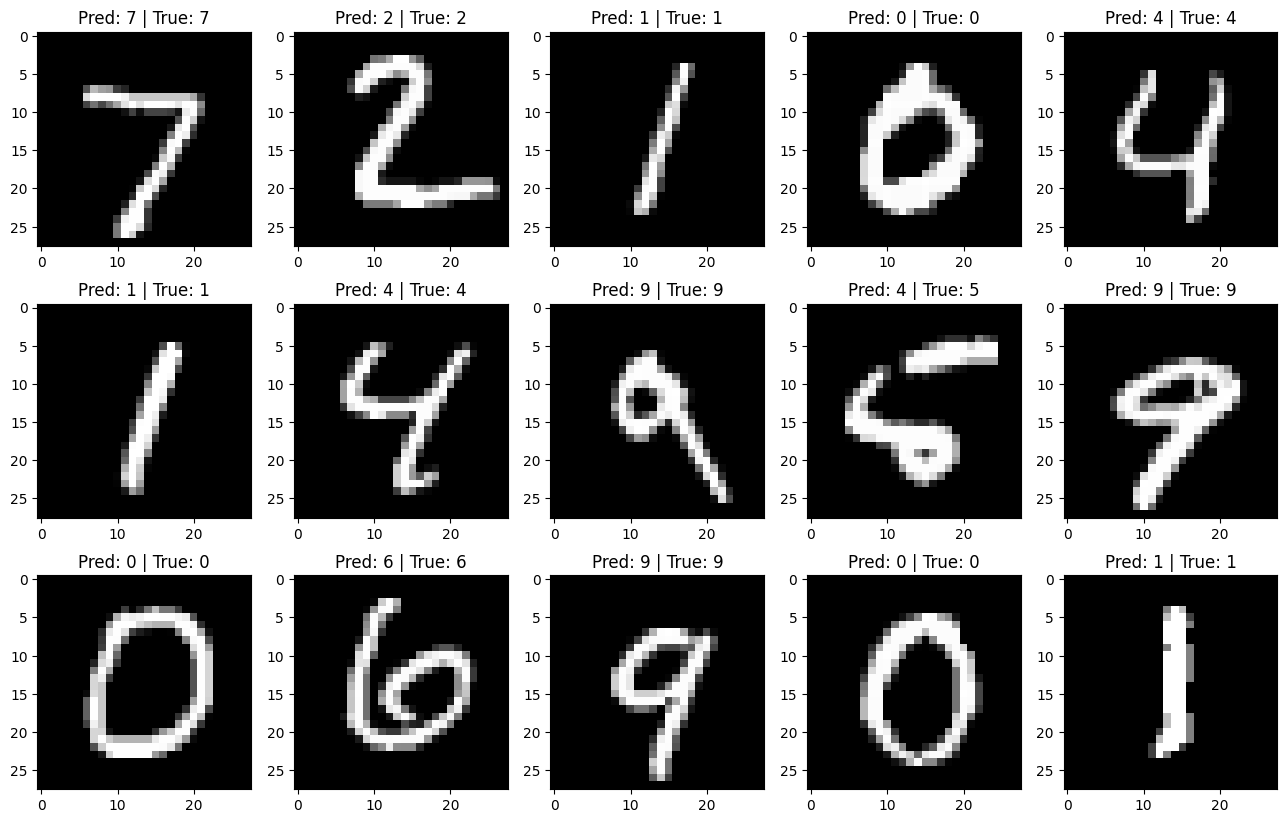

In [166]:
# plot some predictions
fig, ax = plt.subplots(3, 5, figsize=(16, 10))

for i in range(3):
    for j in range(5):
        ax[i, j].imshow(x_test[i*5+j], cmap="gray")
        ax[i, j].set_title(f"Pred: {y_test_preds[i*5+j].item()} | True: {y_test[i*5+j]}")
plt.show()
